In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model

[798. 725. 480.]
Training data shape :  (2003, 2000, 1) (2003,)
Total number of outputs :  4
Output classes :  [1 2 3 4]


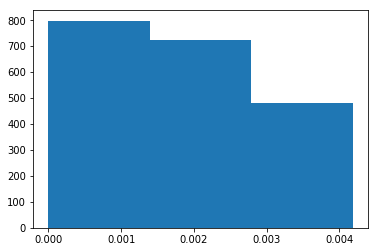

In [3]:
spot_coverages = np.load('data/all_fs.npy')

bin_edges = np.linspace(0, spot_coverages.max(), 4)

n = plt.hist(spot_coverages, bin_edges)[0]; 
print(n)
bin_inds = np.digitize(spot_coverages, bin_edges)

train_X = np.load('data/residuals.npy')[:-1, :, np.newaxis]

train_Y = bin_inds

print('Training data shape : ', train_X.shape, train_Y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

train_X = train_X.astype('float32')

from keras.utils import to_categorical

train_Y_one_hot = to_categorical(train_Y)

from sklearn.model_selection import train_test_split

train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, 
                                                              test_size=0.2, random_state=0)

In [8]:
model = load_model('data/model.hdf5')

In [10]:
predict_y = model.predict(valid_X)

In [16]:
correct = predict_y.argmax(1) == valid_label.argmax(1)

np.count_nonzero(correct)/len(correct)

0.8877805486284289